## Table of contents
1. Defining the problem statement
2. Imports
3. Exploratory data analysis
    3.1 Univariate analysis
    3.2 Bivariate analysis
4. Label Encoding
5. Feature scaling
6. Model building
7. Conclusion

### 1. Defining the problem statement

The aim of this project is to predict whether a customer will churn or not and take steps to change before the customer gives up the product or service.



### Description of each variable

Customer churn - measures the number of clients who discontinue a service (cellphone plan, bank account, SaaS application...) or stop buying products (retail, e-commerce...) in a given time period. This dataset for Telecom customer churn is picked up from IBM Watson Sample datasets.

This dataset contains total 7043 records. Each record is unique for a customer identified using feature customerID. Here the target column on which we will peform classification is Churn which tells whether customer churn or not. Dataset contain total 21 columns whose details are below:

customerID - Customer ID uniquly identifying record of a customer

gender - Customer gender (female, male)

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract -The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn -Whether the customer churned or not (Yes or No)

### 2. Importing librabries

In [1]:

import numpy as np                        # For Mathematical calculations      
import pandas as pd                       # Helps to analyse data  
import seaborn as sns                     # For data visualisation
from matplotlib import pyplot as plt      # For plotting graphs
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
import plotly.express as px
import chart_studio.plotly as py
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
  

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')         #Ignoring warnings

In C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
#Load dataset
df=pd.read_csv('telco_churn_final.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Different data types in the dataset
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [6]:
df.shape

(7043, 21)

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

customerID          7043
gender                10
SeniorCitizen          2
Partner                2
Dependents             2
tenure                74
PhoneService           2
MultipleLines          4
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1587
TotalCharges        6532
Churn                  2
dtype: int64

In [9]:
# How many different names are there?
df.tenure.value_counts()

1         613
72        362
2         238
3         200
4         176
         ... 
39         56
44         51
36         50
0          11
12erer      1
Name: tenure, Length: 74, dtype: int64

In [10]:
#Replacement
df['tenure'] = df['tenure'].replace(['12erer'],'12')
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [11]:
# How many different names are there?
df.MultipleLines.value_counts()

No                  3388
Yes                 2970
No phone service     681
N                      1
Name: MultipleLines, dtype: int64

In [12]:
df['MultipleLines'] = df['MultipleLines'].replace(['N'],'No')
df.MultipleLines.value_counts()

No                  3389
Yes                 2970
No phone service     681
Name: MultipleLines, dtype: int64

In [13]:
# How many different names are there?
df.gender.value_counts()

Male          3550
Female        3483
Malee4           1
Femal-=+e        1
00Male           1
Female234        1
Male231f         1
Male90           1
Female()87       1
Male438          1
Name: gender, dtype: int64

In [14]:
#Replacing typo errors
df['gender'] = df['gender'].replace(['Malee4','Male438','00Male','Male231f','Male90'],'Male')
df['gender'] = df['gender'].replace(['Female234','Femal-=+e','Female()87'],'Female')

In [15]:
df.gender.value_counts()

Male      3555
Female    3486
Name: gender, dtype: int64

In [16]:
# How many different names are there?
df.PaymentMethod.value_counts()


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [17]:
# How many different names are there?
df.tenure.value_counts()


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [18]:
# Converting Total Charges to a numerical data type
df.MonthlyCharges  = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df.TotalCharges  = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               2
SeniorCitizen        0
Partner              0
Dependents           1
tenure               0
PhoneService         3
MultipleLines        3
InternetService      0
OnlineSecurity       2
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       2
TotalCharges        11
Churn                0
dtype: int64

* After looking at the above output, we can say that there are 11 missing values for Total Charges. This values have blank space in the csv file. It's possible to concluded that they are missing due to the fact that the customer never paid anything to the company. Let us drop these 11 rows from our data set

In [19]:
#Removing missing values 
df.dropna(inplace = True)

In [20]:
#Checking missing values after droping another feature
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7021 non-null object
gender              7021 non-null object
SeniorCitizen       7021 non-null int64
Partner             7021 non-null object
Dependents          7021 non-null object
tenure              7021 non-null object
PhoneService        7021 non-null object
MultipleLines       7021 non-null object
InternetService     7021 non-null object
OnlineSecurity      7021 non-null object
OnlineBackup        7021 non-null object
DeviceProtection    7021 non-null object
TechSupport         7021 non-null object
StreamingTV         7021 non-null object
StreamingMovies     7021 non-null object
Contract            7021 non-null object
PaperlessBilling    7021 non-null object
PaymentMethod       7021 non-null object
MonthlyCharges      7021 non-null float64
TotalCharges        7021 non-null float64
Churn               7021 non-null object
dtypes: float64(2), int64(1), o

In [22]:
#Coverting tenure into numeric
df.tenure = pd.to_numeric(df.tenure, errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7021 non-null object
gender              7021 non-null object
SeniorCitizen       7021 non-null int64
Partner             7021 non-null object
Dependents          7021 non-null object
tenure              7021 non-null int64
PhoneService        7021 non-null object
MultipleLines       7021 non-null object
InternetService     7021 non-null object
OnlineSecurity      7021 non-null object
OnlineBackup        7021 non-null object
DeviceProtection    7021 non-null object
TechSupport         7021 non-null object
StreamingTV         7021 non-null object
StreamingMovies     7021 non-null object
Contract            7021 non-null object
PaperlessBilling    7021 non-null object
PaymentMethod       7021 non-null object
MonthlyCharges      7021 non-null float64
TotalCharges        7021 non-null float64
Churn               7021 non-null object
dtypes: float64(2), int64(2), ob

### 3. Exploratory Data Analysis

### 3.1 Univariate analysis

In [24]:
# Percentage distribution
df['Churn'].value_counts(normalize=True)

No     0.734368
Yes    0.265632
Name: Churn, dtype: float64

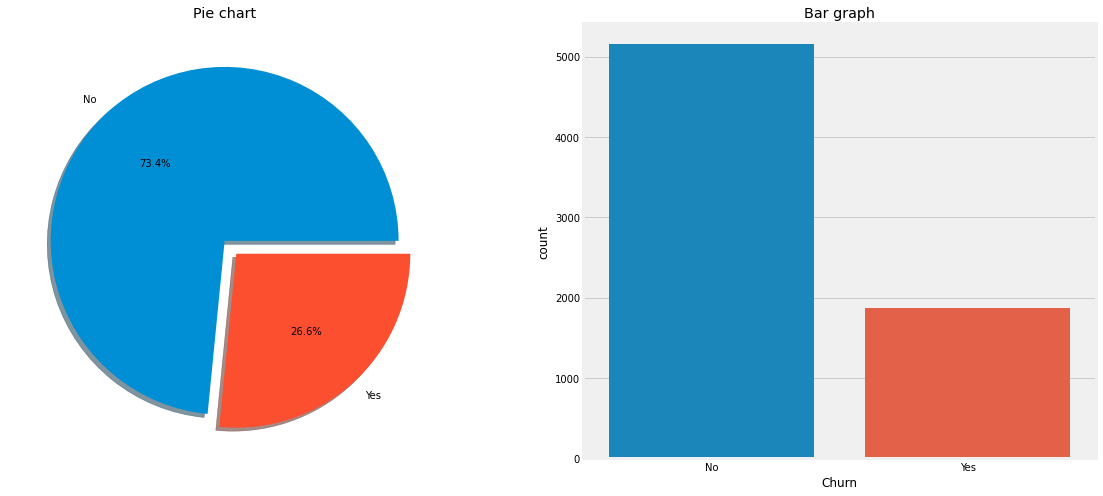

In [25]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie chart')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Bar graph')
plt.show()

We are trying to predict if the client left the company in the previous month. This binary classificaction problems depicts an imbalanced dataset
Churn: No - 73.4%
Churn: Yes - 26.6%

In [26]:
# Descriptive statistics of the data set accessed.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162085,32.442814,64.783158,2284.462762
std,0.368555,24.547809,30.092741,2267.239039
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.550000,401.950000
50%,0.000000,29.000000,70.350000,1398.250000
75%,0.000000,55.000000,89.850000,3795.450000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
#Checking first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3.2 Bivariate analysis

## Types of categories / Data

* Categorical features: 6 Binary features(Gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling)
   ** 8 features with three unique values           
   (InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,OnlineBackup)
   ** One feature with four unique values (PaymentMethod)
* Ordinal features: Categorical features with hierarchy(Contract)
* Numerical features: Features with numerical values(tenure,MonthlyCharges,TotalCharges)

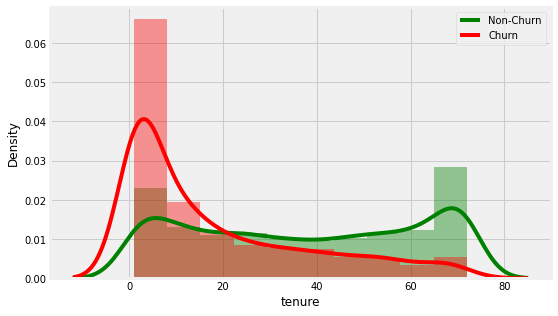

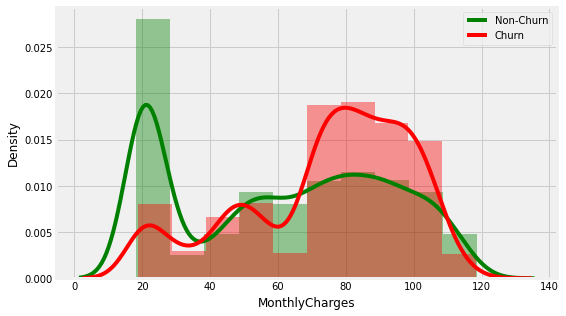

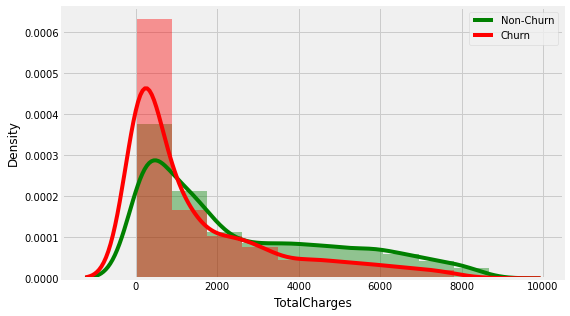

In [28]:
# numerical features grouped by churn
labels = 'Non-Churn', 'Churn'
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 'No'][col],
                 bins=10,
                 color='green',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(df[df.Churn == 'Yes'][col],
                 bins=10,
                 color='red',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

### Numeric Features analysis
(1) Tenure: Customer with less tenure is more likely to churn.We can say that most churn customers have a tenure of around 0 to 20 months

(2) Monthly Charges:Higher % of customers churn when the monthly charges are high. We can say that most churn customers have monthly charges of around 70 to 110

(3) Total Charges: The distribution is similar for both churn customers and non-churn customers, meaning that the feature Monthly Charges may not be a good predictor.


### Categorical features (Independant categorical variable vs target variable)

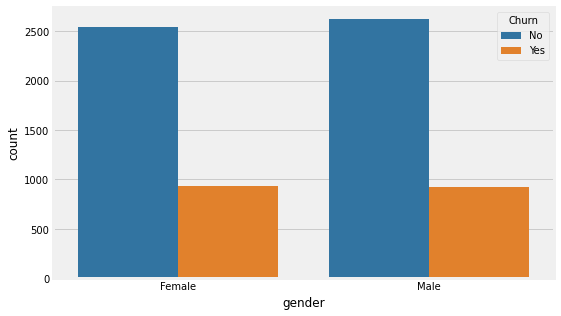

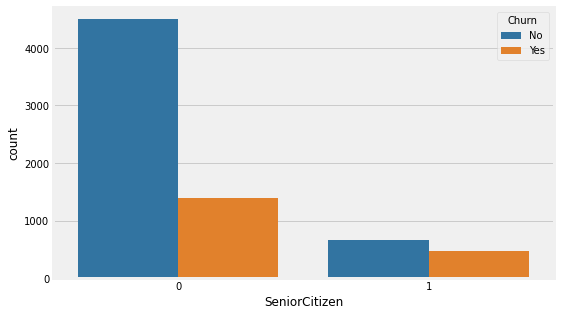

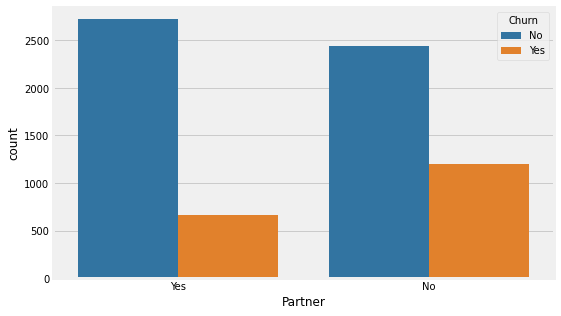

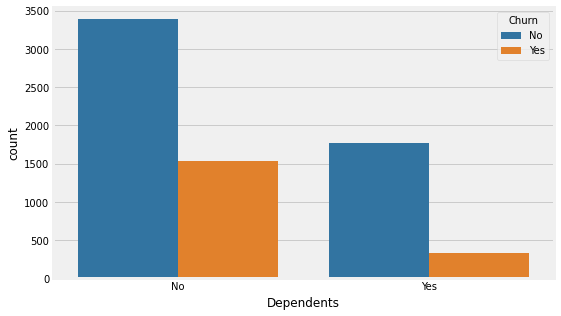

In [29]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

### Categorical Features conclusion
(1) Gender: The churn rate is similar between male and female, Therefore Gender is not an indicative of churn.

(2) Senior Citizen: Customer who is senior citizen is more likely to churn.

(2) Partner: Customers that do not have partners are more likely to churn

(3) Dependents: Customers without any dependent have higher churn ratio as compared to ones having dependents.

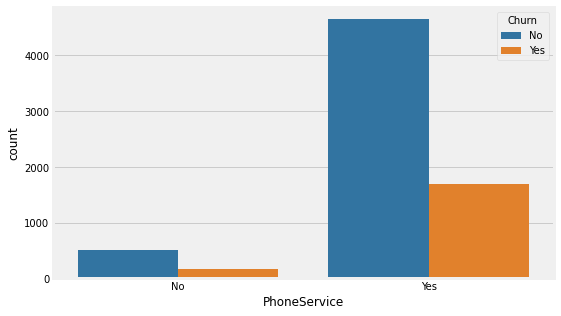

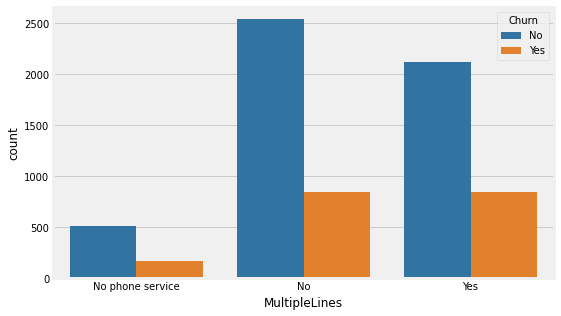

In [30]:
for col in ['PhoneService', 'MultipleLines']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(4) Phone Service: First observation from above graph is most of the people have Phone Service.Those who don't have may be are only using Internet service of the telecom company.Also, people having phone service have higher churn ratio.

(5) Multiple Lines: Customer who has multiple lines is slightly more likely to churn.

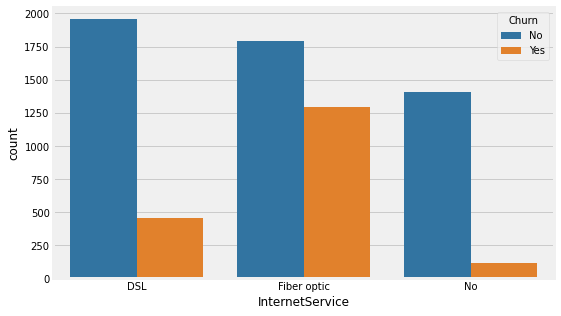

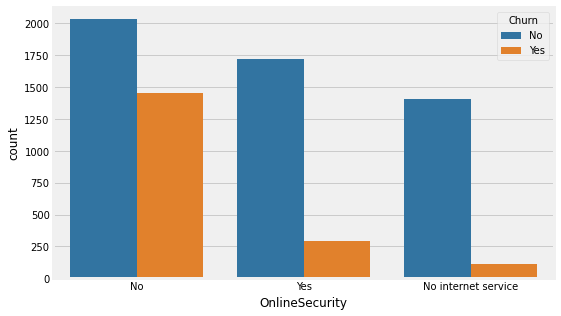

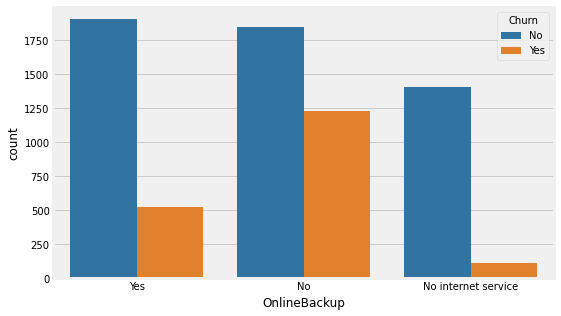

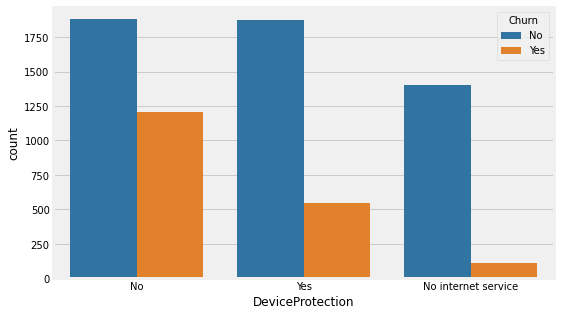

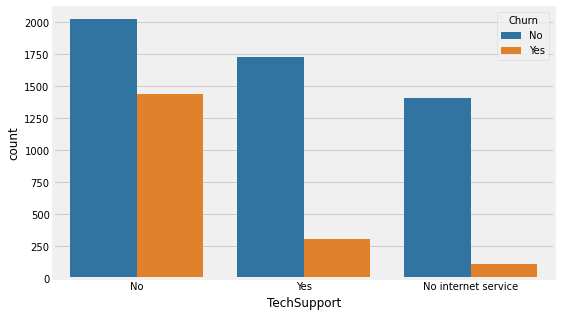

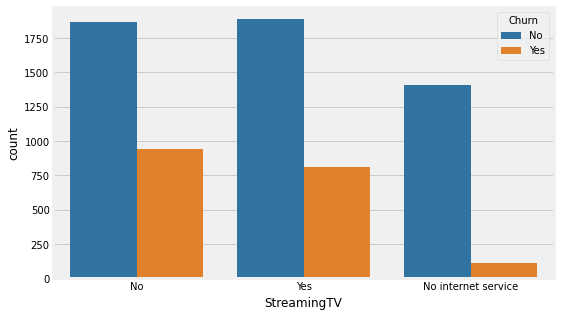

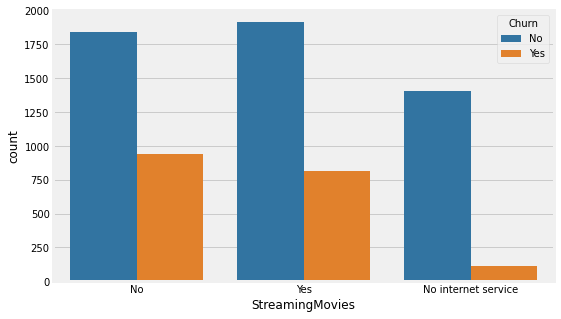

In [31]:
for col in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(6) Internet Service: If customer's Internet service provider is Fiber optic, then he/she is more likely to churn.

(7) Online Security: Customer who does not have online security is more likely to churn.

(8) Online Backup: Customer who does not have online backup is more likely to churn.

(9) Device Protection: Customer who does not have device protection is more likely to churn.

(10) Tech Support: Customer who does not have tech support is more likely to churn.

(11) Streaming TV / Streaming Movies: Streaming TV and Streaming Movies have no big effect on churn rate; however, if customer does not have internet service, then he/she is less likely to churn.

(12) Customers with the first 4 additionals (security to tech support) are more unlikely to churn. Streaming service is not predictive for churn

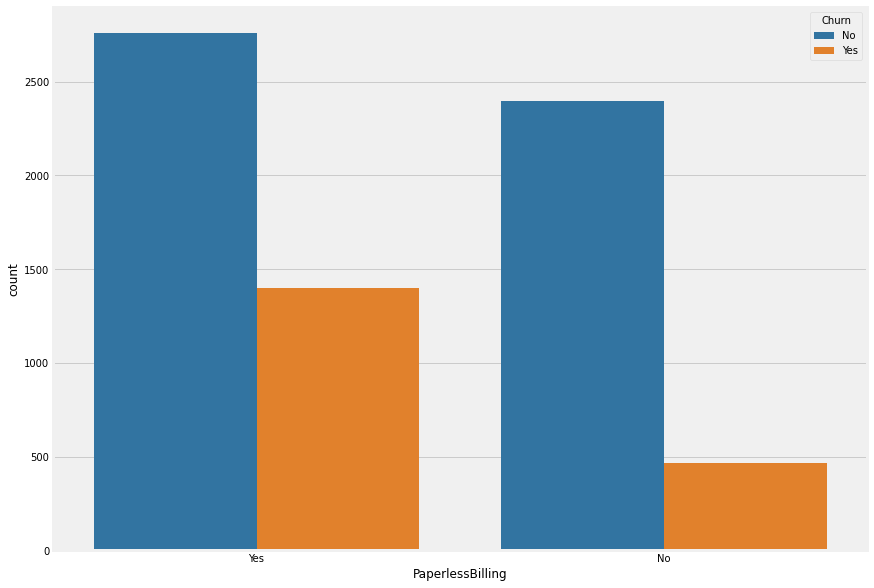

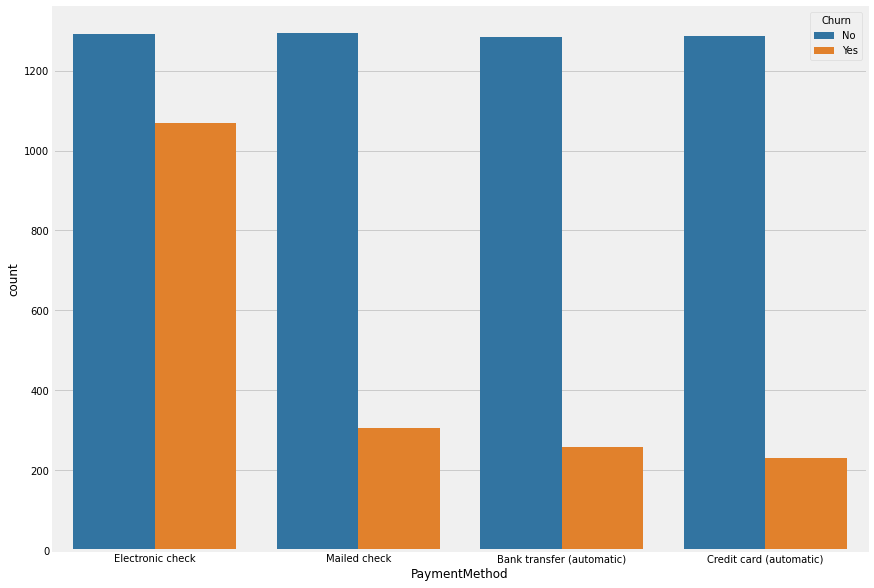

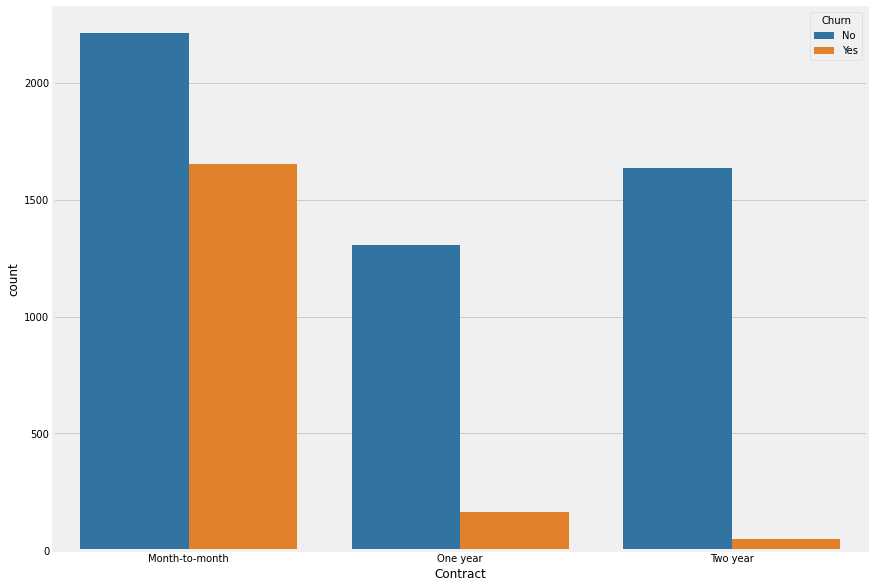

In [32]:
for col in ['PaperlessBilling', 'PaymentMethod', 'Contract',]:
    plt.figure(figsize=(13,10))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(12) Paper less Billing: Customer who has paperless billing is more likely to churn. Customers not having paperless billing have higher churn ratio as compared to having paperless billing. Also, more people have paperless billing. It's good that people prefer eco-friendly bills

(13) Payment Method: Customer who uses electronic check to pay bills is more likely to churn than those who using other payment methods.

(14) Contract: Short term contracts have higher churn rates



In [33]:
#counts of different bill payment methods using pie chart
target= df['PaymentMethod'].value_counts()
levels = ['Electronic check','Mailed check','Bank transfer','Credit card']
trace = go.Pie(labels=target.index,values=target.values
               )
layout = dict(title="Telco Customer Payment Method", margin=dict(l=50), width=800, height=500)
figdata = [trace]
fig = go.Figure(data=figdata, layout=layout)
iplot(fig)

Around 33.6% of customers use Electronic check to pay their telecom bills. 

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df['OnlineSecurity'].value_counts()

No                     3488
Yes                    2014
No internet service    1519
Name: OnlineSecurity, dtype: int64

Here in above column OnlineSecurity, we can replace No internet service with No .Similar is the case with other columns like OnlineBackup ,DeviceProtection ,TechSupport ,StreamingTV ,StreamingMovies.

In [36]:
internet_features = ['OnlineSecurity','OnlineBackup' ,'DeviceProtection' ,
                     'TechSupport' ,'StreamingTV' ,'StreamingMovies','InternetService']

In [37]:
#replace No internet service with No
df[internet_features]=df[internet_features].replace('No internet service','No')

In [38]:
#let's verify it
df['OnlineSecurity'].value_counts()

No     5007
Yes    2014
Name: OnlineSecurity, dtype: int64

In [39]:
df['MultipleLines'].value_counts()

No                  3381
Yes                 2962
No phone service     678
Name: MultipleLines, dtype: int64

In [40]:
#replace No phone service with No
df['MultipleLines'].replace('No phone service','No',inplace=True)

In [41]:
df['MultipleLines'].value_counts()

No     4059
Yes    2962
Name: MultipleLines, dtype: int64

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4.Label encoding

In [43]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [44]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
     
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

13 columns were label encoded.


In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [46]:
#Drop customer ID because is not important
df=df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [47]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [49]:
#Coverting remaining categorical features into dummies
df1 = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'], drop_first = True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [50]:
#Checking the new data types
df1.dtypes

gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                     int64
PhoneService                               int32
MultipleLines                              int32
OnlineSecurity                             int32
OnlineBackup                               int32
DeviceProtection                           int32
TechSupport                                int32
StreamingTV                                int32
StreamingMovies                            int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [51]:
#Checking whether are there any missing values before training the model
df1.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [52]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
df1.shape

(7021, 24)

### 5. Feature Scaling

In [54]:
#Creating a new dataframe for all dummies
cat_df=df1[['gender','SeniorCitizen','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','MultipleLines','InternetService_Fiber optic','InternetService_No','Contract_One year','Contract_Two year','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']]

In [55]:
cat_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,PaperlessBilling,MultipleLines,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [56]:
#Dropping all dummy variables and save target in (y) because sklearn requires target variable in a separate dataset
X = df1.drop(['Churn','gender','SeniorCitizen','Partner','Dependents','StreamingTV','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn','MultipleLines','InternetService_Fiber optic','InternetService_No','Contract_One year','Contract_Two year','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check'], axis = 1)
y = df1['Churn']
cols = X.columns
index = X.index

In [57]:
#Independant variables to be scalled down so that they don't impact our models
X.head()    

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [58]:
#Scaling down features so that high values do not impact the model 
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [59]:
#Merging two dataframes
X = pd.concat([X,cat_df], axis = 1)

In [60]:
#First 5 rows
X.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MultipleLines,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.608696,-0.745856,-0.403241,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0.108696,-0.246777,0.144762,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,-0.586957,-0.303867,-0.380168,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0.347826,-0.516575,0.130396,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.586957,0.006446,-0.367349,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [61]:
#First 5 rows of the target
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [62]:
#Check the shape
print(X.shape, y.shape)

(7021, 22) (7021,)


### 6. Model Building 

In [63]:
#Importing Machine Leaning Algorithms
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
# Train-Test Separation
X_train, X_cv, y_train, y_cv = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=12345)


In [65]:
print(X_train.shape, X_cv.shape, y_train.shape, y_cv.shape)

(4914, 22) (2107, 22) (4914,) (2107,)


In [66]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [67]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_cv)
        accuracy = accuracy_score(y_cv, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.802563)
KNN: (0.755577)
CART: (0.733270)
RF: (0.794020)
SVM: (0.795444)
XGB: (0.801139)
LightGBM: (0.797342)
CatBoost: (0.798766)


##### 7) Conclusion

The aim of this study was to create classification models for the churn dataset and to predict whether a customer will churn by creating models and to obtain maximum accuracy score in the established models. The work done is as follows:

1) Churn Data Set read.

2) Some of my views from EDA are; 
* There is no difference in churn ratio for male and female.
* Churn ratio for senior citizens is significantly higher. Company must focus on some specific needs of senior citizens.
* Customers with paperless billing have higher churn ratio! May be the people having their bills deliverd in hard copy(paper)are loyal customers of the company.
* Customers paying bills via Electronic check have higher churn ratio. Company must focus on them and ask them if they are facing any difficulties in paying bills via electronic check or not?
* Customers not having TechSupport from the telecom company have higher churn rate. If company is charging high rates for TechSupport, then they must consider giving some discounts on them so that customers can use the service.

3) During Model Building; Logistic regression,KNN, SVM, CART, Random Forests, XGBoost, LightGBM, CatBoost were used to calculate accuracy score. 
* From accuracy scores of all  models, we can see that Logistic regression outperformed other models with accuracy of 80.25%.

=============To be continued ===========